# GTK performance study
Literature:
- [NA62 detector paper](https://iopscience.iop.org/article/10.1088/1748-0221/12/05/P05025/pdf)
- [K->pinn theoretical overview](https://arxiv.org/pdf/1503.02693.pdf)
- [GTK paper](https://arxiv.org/pdf/1904.12837.pdf)
- [HSF training](https://hsf-training.github.io/analysis-essentials/python/README.html)
- [`ROOT` documentation](https://root.cern/)
- [`uproot` documentation](https://uproot.readthedocs.io/en/latest/)
- [TDCPix design manual (just incase)](https://espace.cern.ch/tdc-pix/Shared%20Documents/20130506TDCpix_design_manual.pdf)

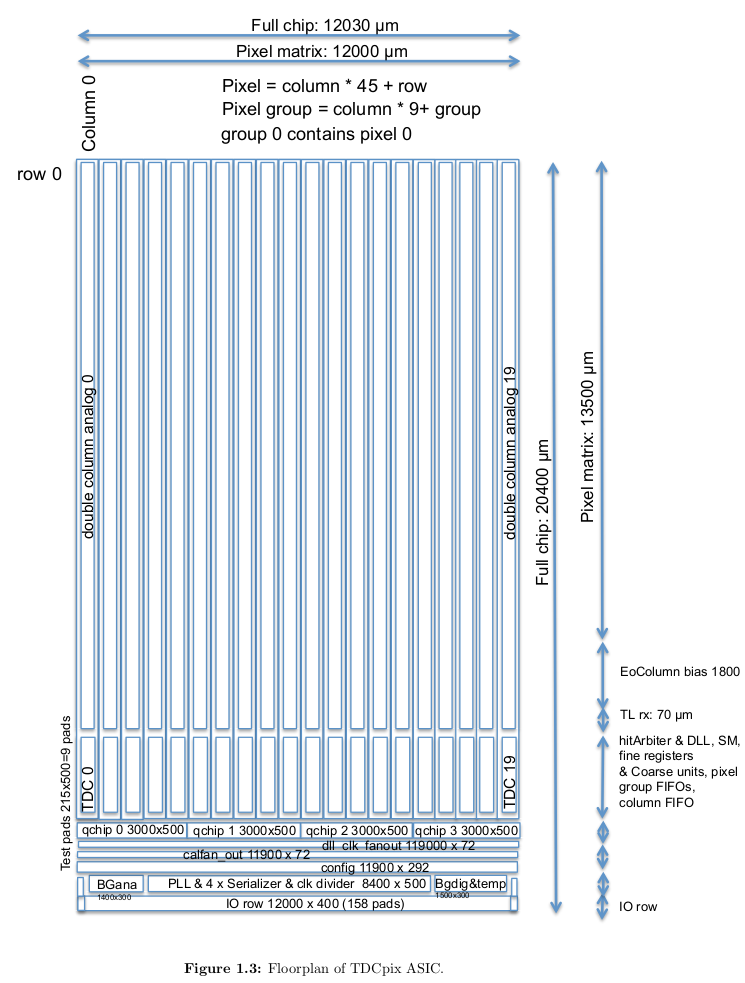

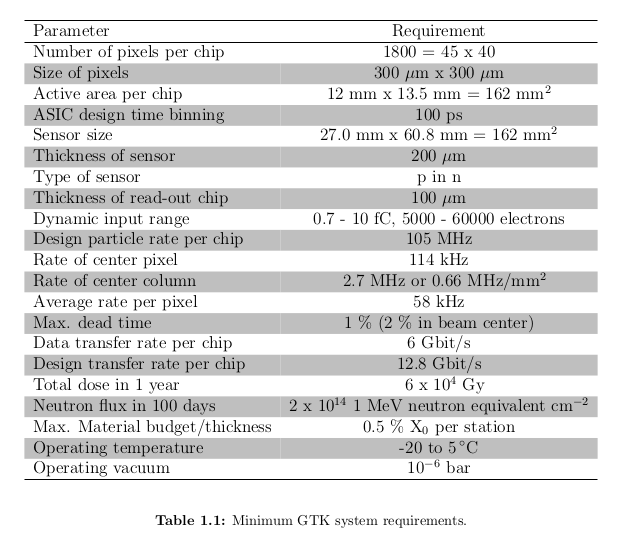

In [7]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.colors as mcolors
import copy
import ROOT

Welcome to JupyROOT 6.26/06


In [5]:
# This is just how I like quickly setup plots, change to whatever you like:
colormap = copy.copy(pl.cm.get_cmap("viridis")) # rainbow
colormap.set_under('w',1)

textsize=18
plotw=10
ploth=8

pl.rc('xtick',labelsize=textsize)
pl.rc('ytick',labelsize=textsize)
pl.rc('axes', linewidth = 2)

### NA62 Run 1, Run 9001

In [8]:
# Set file path as in your setup:
FilePath="../../MyAnalysis/tmpacc/tp4b/Run009001_gtk_tp4b_1802.root"
myFile = ROOT.TFile.Open(FilePath)
myTree = myFile.GTKStudyTtree
# Don't mind warnings, they are related to the NA62FW ROOT dictionary, which we don't have setup here

Warning in <TClass::Init>: no dictionary for class Stream is available
Warning in <TClass::Init>: no dictionary for class RecoInfo is available
Warning in <TClass::Init>: no dictionary for class AnalysisInfo is available
Warning in <TClass::Init>: no dictionary for class CheckPointInfo is available
Warning in <TClass::Init>: no dictionary for class NA62Analysis::Core::AnalyzerIdentifier is available
Warning in <TClass::Init>: no dictionary for class MCInfo is available
Warning in <TClass::Init>: no dictionary for class BeamLineInfo is available


In [9]:
# Check the branches:
myTree.Show(0)

======> EVENT:0
 RunID           = 9001
 BurstID         = 1
 EventID         = 10059
 EventTS         = 49486261
 InstantaneousIntensity = 185.185
 K3piVertex_x    = 53.7267
 K3piVertex_y    = 2.73911
 K3piVertex_z    = 141683
 K3piVertex_t    = 17.9379
 K3piKTAG_t      = 17.8034
 K3piKTAG_nsectors = 6
 K3piTotalMom_Px = 93.6885
 K3piTotalMom_Py = 1.32014
 K3piTotalMom_Pz = 75818.8
 K3piVertexGTK3_x = 5.24355
 K3piVertexGTK3_y = 2.08316
 K3piVertexGTK3_z = 102400
 K3piTotalMomGTK3_Px = 93.4278
 K3piTotalMomGTK3_Py = 1.29883
 K3piTotalMomGTK3_Pz = 75818.8
 GTKTrackGTK3_x  = (vector<float>*)0x55a6e537ce40
 GTKTrackGTK3_y  = (vector<float>*)0x55a6e53725e0
 GTKTrack_t      = (vector<float>*)0x55a6e532f1d0
 GTKTrack_Px     = (vector<float>*)0x55a6e53209f0
 GTKTrack_Py     = (vector<float>*)0x55a6e52edd50
 GTKTrack_Pz     = (vector<float>*)0x55a6e5362370
 GTKTrack_chi2   = (vector<float>*)0x55a6e5323a70
 GTKTrack_nhits  = (vector<float>*)0x55a6e52f0f80
 GTKHit_x        = (vector<float>*)0x5

In [13]:
# fill dx, dy, dt, dPx, dPy, dPz:
dx=[]
dy=[]
dt=[]
dPx=[]
dPy=[]
dPz=[]
for entry in myTree:
    for x,y,t,px,py,pz in zip(entry.GTKTrackGTK3_x, entry.GTKTrackGTK3_y, entry.GTKTrack_t, entry.GTKTrack_Px, entry.GTKTrack_Py, entry.GTKTrack_Pz):

        if np.abs(t-entry.K3piKTAG_t)>1:
            continue
        
        dx.append(x-entry.K3piVertexGTK3_x)
        dy.append(y-entry.K3piVertexGTK3_y)
        dt.append(t-entry.K3piKTAG_t)
        dPx.append(px-entry.K3piTotalMom_Px)
        dPy.append(py-entry.K3piTotalMom_Py)
        dPz.append(pz-entry.K3piTotalMom_Pz)
        

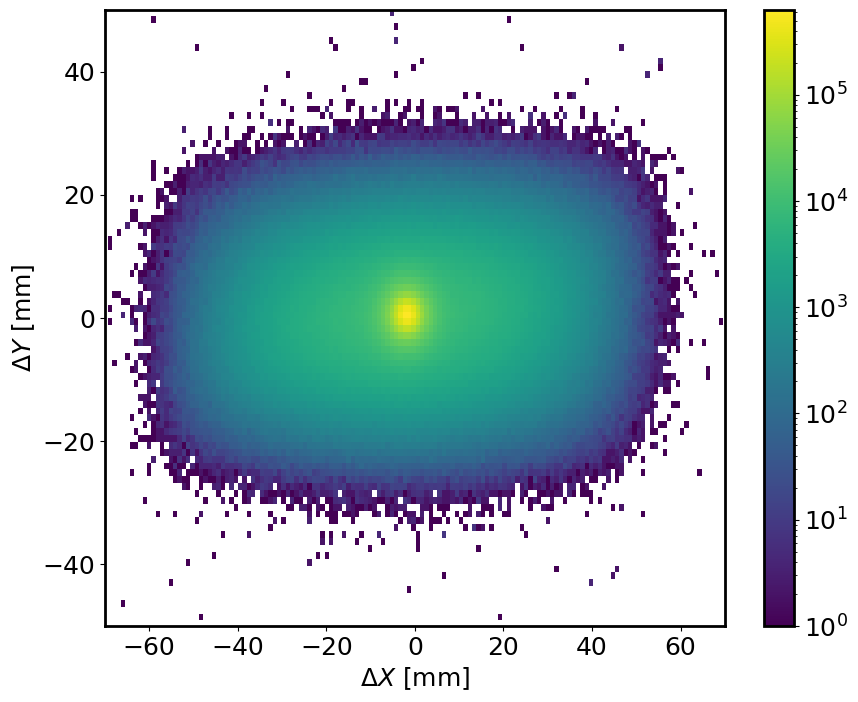

In [7]:
# Vertex position vs GTK track position @ GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(dx, dy, bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'$\Delta X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'$\Delta Y$ [mm]', fontsize=textsize)

ax.set_xlim(-70, 70)
ax.set_ylim(-50, 50)

pl.colorbar(h[3], ax=ax)  # show color scale

In [10]:
from scipy.stats import norm
from scipy.optimize import curve_fit

In [11]:
def gaussp0(x, const0, const1, mean, sigma):
    return const0+const1*np.exp(-((x-mean)**2/(2*sigma**2)))
def gauss2(x, const0, const1, mean1, sigma1, const2, mean2, sigma2):
    return const0+const1*np.exp(-((x-mean1)**2/(2*sigma1**2))) + const2*np.exp(-((x-mean2)**2/(2*sigma2**2)))

NameError: name 'dx' is not defined

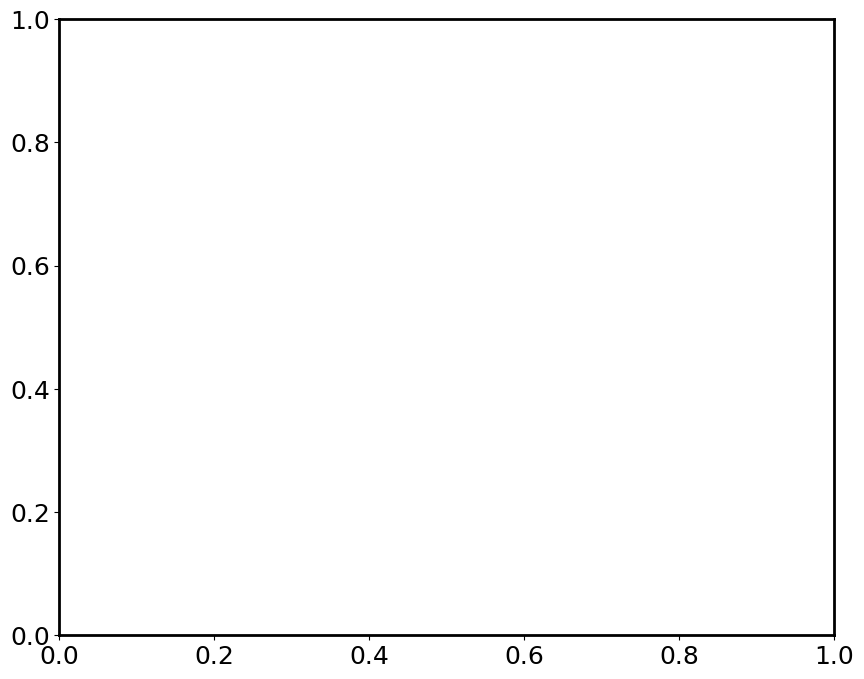

In [12]:
fig, ax= pl.subplots(figsize=(plotw,ploth))

nbins = 400
x_range = [-60, 60] #Mass is in GeV
bin_width = (x_range[1] - x_range[0])/nbins
counts, bins = pl.hist(dx, histtype="step", linewidth=2, bins=nbins, range=x_range)

ax.set_xlabel(r'$\Delta X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'Counts/0.3 mm', fontsize=textsize)


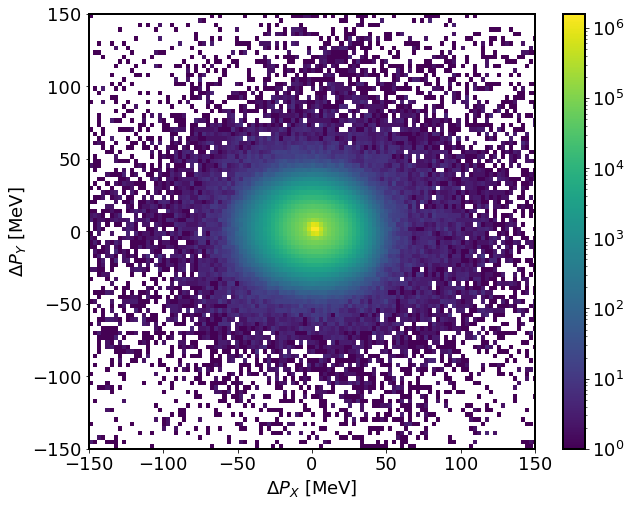

In [23]:
# Vertex position vs GTK track position @ GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(dPx, dPy, bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'$\Delta P_X$ [MeV]', fontsize=textsize)
ax.set_ylabel(r'$\Delta P_Y$ [MeV]', fontsize=textsize)

ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)

pl.colorbar(h[3], ax=ax)  # show color scale

In [ ]:
# We also can open the file with uproot. Note it is not very happy because of std::vectors...
file = uproot.open(FilePath)

gtk_tree = file["GTKStudyTtree"]
gtk_tree.show()

In [ ]:
k3pi_df=gtk_tree.arrays(["K3piVertex_x", "K3piVertex_y", "K3piVertex_z", "K3piVertexGTK3_x","K3piVertexGTK3_y","K3piVertexGTK3_z",
                        "K3piTotalMomGTK3_Px", "K3piTotalMomGTK3_Py", "K3piTotalMomGTK3_Pz"], library="pd")

In [ ]:
k3pi_df.head()

In [ ]:
fig, ax= pl.subplots(figsize=(plotw, ploth))

pl.hist(0.001*k3pi_df["K3piVertex_z"], bins=150)
ax.set_xlabel(r'K3$\pi$ Z vertex [m]', fontsize=textsize)

ax.set_yscale('log')

ax.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='both', width=2, length=5, labelsize=textsize, grid_color='black')

In [ ]:
# Vertex position
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(k3pi_df['K3piVertex_x'], k3pi_df['K3piVertex_y'], bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'K3$\pi_X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'K3$\pi_Y$ [mm]', fontsize=textsize)

ax.set_xlim(-150, 200)
ax.set_ylim(-150, 150)

pl.colorbar(h[3], ax=ax)  # show color scale


In [ ]:
# Vertex position @GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(k3pi_df['K3piVertexGTK3_x'], k3pi_df['K3piVertexGTK3_y'], bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'K3$\pi_X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'K3$\pi_Y$ [mm]', fontsize=textsize)

ax.set_xlim(-60, 50)
ax.set_ylim(-50, 50)

pl.colorbar(h[3], ax=ax)  # show color scale